<a href="https://colab.research.google.com/github/Ketansai11/text_summarization/blob/main/TEXT_SUMMARIZATION_GRAPH_BASED_BLEU_SCAPY_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load the information into a DataFrame for convenient access.

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('C:/Users/chandu/Downloads/archive (15)'):
    for filename in filenames:
        (os.path.join(dirname, filename))

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.listdir("C:/Users/chandu/Downloads/archive (15)/BBC News Summary/BBC News Summary/News Articles")

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
os.listdir("C:/Users/chandu/Downloads/archive (15)/BBC News Summary/BBC News Summary/Summaries")

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
articles_path = "C:/Users/chandu/Downloads/archive (15)/BBC News Summary/BBC News Summary/News Articles"
summaries_path = "C:/Users/chandu/Downloads/archive (15)/BBC News Summary/BBC News Summary/Summaries"
categories_list = os.listdir(articles_path)
categories_list

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
import glob as glob
import os

def read_file(articles_path, summaries_path, categories_list, encoding="ISO-8859-1"):
    articles = []
    summaries = []
    categories = []
    article_or_summary = []
    paths = []  # New list to store file paths

    for category in categories_list:
        article_paths = glob.glob(os.path.join(articles_path, category, '*.txt'), recursive=True)
        summary_paths = glob.glob(os.path.join(summaries_path, category, '*.txt'), recursive=True)

        print(f'found {len(article_paths)} file in articles/{category} folder, {len(summary_paths)} file in summaries/{category}')

        if len(article_paths) != len(summary_paths):
            print("number of files is not equal")
            return

        for file in range(len(article_paths)):
            categories.append(category)
            with open(article_paths[file], mode='r', encoding=encoding) as files:
                articles.append(files.read())
                article_or_summary.append("article")
                paths.append(article_paths[file])  # Append article file path

            with open(summary_paths[file], mode='r', encoding=encoding) as files:
                summaries.append(files.read())
                article_or_summary.append("summary")
                paths.append(summary_paths[file])  # Append summary file path

    print(f'total {len(articles)} file in articles folder and {len(summaries)} files in summaries folder')
    return articles, summaries, categories, article_or_summary, paths

In [ ]:
import pandas as pd

# Assuming that articles_path, summaries_path, and categories_list are defined

articles, summaries, categories, article_or_summary, paths = read_file(articles_path, summaries_path, categories_list)

# Create new lists with the same length
new_categories = []
new_article_or_summary = []
new_paths = []

for category, item, path in zip(categories, article_or_summary, paths):
    new_categories.append(category)
    new_article_or_summary.append(item)
    new_paths.append(path)

data = pd.DataFrame({"path": new_paths, "category": new_categories, "article_or_summary": new_article_or_summary}, columns=["path", "filename", "category", "article_or_summary"])
data

found 510 file in articles/business folder, 510 file in summaries/business
found 386 file in articles/entertainment folder, 386 file in summaries/entertainment
found 417 file in articles/politics folder, 417 file in summaries/politics
found 511 file in articles/sport folder, 511 file in summaries/sport
found 401 file in articles/tech folder, 401 file in summaries/tech
total 2225 file in articles folder and 2225 files in summaries folder


,path,filename,category,article_or_summary
0,C:/Users/chandu/Downloads/archive (15)/BBC New...,NaN,business,article
1,C:/Users/chandu/Downloads/archive (15)/BBC New...,NaN,business,summary
2,C:/Users/chandu/Downloads/archive (15)/BBC New...,NaN,business,article
3,C:/Users/chandu/Downloads/archive (15)/BBC New...,NaN,business,summary
4,C:/Users/chandu/Downloads/archive (15)/BBC New...,NaN,business,article
...,...,...,...,...
2220,C:/Users/chandu/Downloads/archive (15)/BBC New...,NaN,tech,article
2221,C:/Users/chandu/Downloads/archive (15)/BBC New...,NaN,tech,summary
2222,C:/Users/chandu/Downloads/archive (15)/BBC New...,NaN,tech,article
2223,C:/Users/chandu/Downloads/archive (15)/BBC New...,NaN,tech,summary


In [ ]:
#Exploratory data analysis(EDA)

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=True)

In [ ]:
#Illustrate the distribution of articles among different categories.

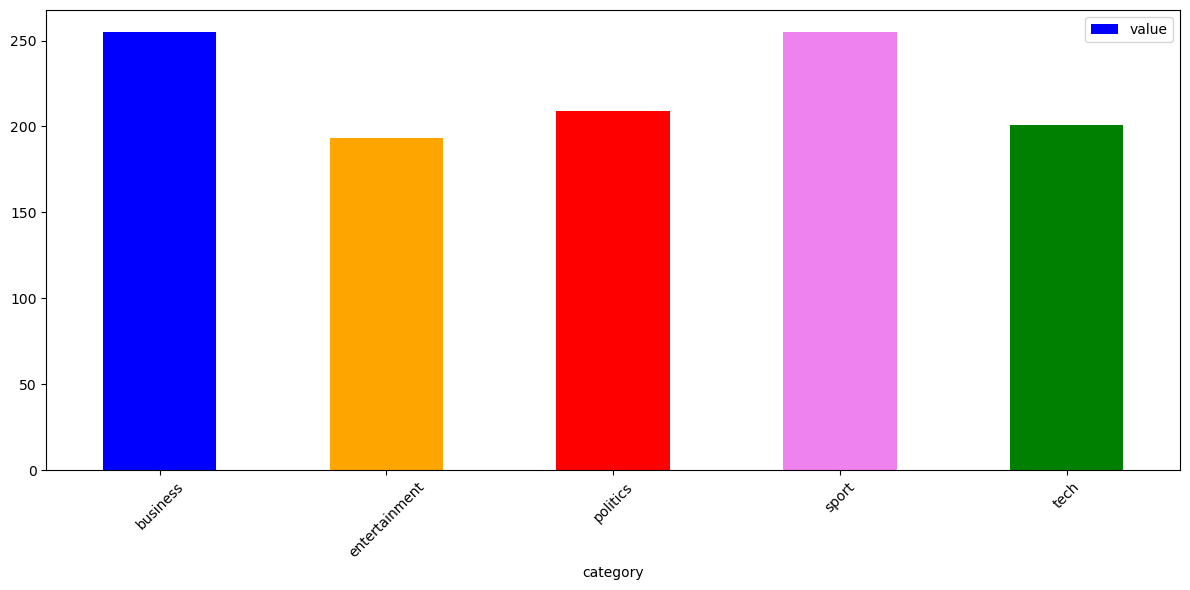

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

ct = Counter(data[data['article_or_summary'] == "article"]["category"])
df = pd.DataFrame({"category": ct.keys(), "value": ct.values()})

# Plot using Pandas
ax = df.plot(kind='bar', x='category', y='value', figsize=(12, 6),color=['blue', 'orange','red','violet','green'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Breakdown of categories and their associated values.

In [ ]:
pd.DataFrame({"category":ct.keys(), "value":ct.values()}).iplot(kind='box')

In [ ]:
#Variation in the sizes of different categories.

In [ ]:
pd.DataFrame({"category":ct.keys(), "value":ct.values()}).iplot(kind='bubble', x='category', y='value', size='value')

In [ ]:
#Percentage distribution within each category.

In [ ]:
pd.DataFrame({"category":ct.keys(), "value":ct.values()}).iplot(kind='pie', labels="category", values='value')

In [ ]:
# APPLYING SENTENCE TOKENIZATION

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import numpy as np
import networkx as nx
import re

In [ ]:
def read_article(text):
    sentences =[]
    sentences = sent_tokenize(text)
    for sentence in sentences:
        sentence.replace("[^a-zA-Z0-9]"," ")
    return sentences

In [ ]:
file_path = data[data['article_or_summary'] == 'article'].iloc[0]['path']
with open(file_path, "r") as f:
    article = f.read()


In [ ]:
sent_tok = read_article(article)
sent_tok

['Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.',
 'The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales.',
 'TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.',
 'Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.',
 'Time Warner said on Friday that it now owns 8% of search-engine Google.',
 'But its own internet business, AOL, had has mixed fortunes.',
 'It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.',
 "However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues.",
 "It hopes to increase subscribers by offering the online service free to TimeWarner internet cu

In [ ]:
#Implementing spell correction

In [ ]:
import textblob
from textblob import TextBlob
mod_sent = []
for tok in sent_tok:
    blob_obj = TextBlob(tok)
    correct_sent = str(blob_obj.correct())
    print(f"\033[94m Original Token : {tok} \033[0m")
    print(f"\033[92m Corrected Token: {correct_sent} \033[92m")
    mod_sent.append(correct_sent)

 Original Token : Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier. 
 Corrected Token: D sales boost Time Earner profit

Quarterly profits at of media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier. 
 Original Token : The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. 
 Corrected Token: The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher avert sales. 
 Original Token : TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. 
 Corrected Token: TimeWarner said fourth quarter sales rose 2% to $11.in from $10.in. 
 Original Token : Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users fo

In [ ]:
#Rephrased sentences

In [ ]:
" ".join(mod_sent)

'D sales boost Time Earner profit\n\nQuarterly profits at of media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier. The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher avert sales. TimeWarner said fourth quarter sales rose 2% to $11.in from $10.in. Its profits were buoyed by one-off gains which offset a profit dip at Earner Gros, and less users for AOL. Time Earner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL\

In [ ]:
# CHECKING FOR THE SENTENCE SIMILARITY

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def sentence_similarity(sent1,sent2,embed):
    A = embed([sent1])[0]
    B = embed([sent2])[0]
    return 1 - (np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B)))

In [ ]:
print(f"\033[92m Sentence 1 : {mod_sent[0]}")
print(f"\033[92m Sentence 2 : {mod_sent[1]}")
print(f"\033[92m Similarity Score : {sentence_similarity(mod_sent[0], mod_sent[1], embed)}")

 Sentence 1 : D sales boost Time Earner profit

Quarterly profits at of media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.
 Sentence 2 : The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher avert sales.
 Similarity Score : 0.6458545923233032


In [ ]:
def build_similarity_matrix(sentences,embeds):
    similarity_matrix = np.zeros((len(sentences),len(sentences)))
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1!=idx2:
                similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1],sentences[idx2],embeds)
    return similarity_matrix

In [ ]:
sim_mat = build_similarity_matrix(mod_sent, embed)

In [ ]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
import networkx
from bokeh.io import output_notebook, show, save

output_notebook()

g = nx.Graph()

for i in range(sim_mat.shape[0]):
    for j in range(sim_mat.shape[1]):
        if sim_mat[i][j] >=.9:
            g.add_edge(i, j)

HOVER_TOOLTIPS = [("sent_tok", "@index")]
plot = figure(tooltips = HOVER_TOOLTIPS, tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1))

network_graph = from_networkx(g, networkx.spring_layout, scale=7, center=(0, 0))
network_graph.node_renderer.glyph = Circle(size=15,fill_color='green')
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)
plot.renderers.append(network_graph)
show(plot)

Loading BokehJS ...

In [ ]:
# FURTHER STEP IS SUMMARIZATION

In [ ]:
# Check if there are any rows where 'article_or_summary' equals 'Summary'
summary_rows = data[data['article_or_summary'] == 'summary']

if not summary_rows.empty:
    # Access the first row where 'article_or_summary' equals 'Summary'
    file_path_summary = summary_rows.iloc[0]['path']

    # Open and read the file
    with open(file_path_summary, "r") as f:
        actual_summary = f.read()

    # Do further processing with actual_summary
    ...
else:
    print("No rows found where 'article_or_summary' equals 'Summary'")


In [ ]:
def generate_summary(text,top_n,embeds):
    summarize_text = []
    sentences = read_article(text)
    sentence_similarity_matrix = build_similarity_matrix(sentences,embeds)
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)
    ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)),reverse=True)
    for i in range(top_n):
        summarize_text.append(ranked_sentences[i][1])
    return " ".join(summarize_text)

In [ ]:
Original_Text = " ".join(mod_sent)
Summarized_Text = generate_summary(Original_Text, top_n=5, embeds=embed)

In [ ]:
Original_Text

'D sales boost Time Earner profit\n\nQuarterly profits at of media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier. The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher avert sales. TimeWarner said fourth quarter sales rose 2% to $11.in from $10.in. Its profits were buoyed by one-off gains which offset a profit dip at Earner Gros, and less users for AOL. Time Earner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL\

In [ ]:
Summarized_Text

'"Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility," chairman and chief executive Richard Parsons said. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. TimeWarner also has to estate 2000 and 2003 results following a probe by the of Securities Exchange Commission (SEC), which is close to concluding. Time Earner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes.'

In [ ]:
actual_summary

"TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn.Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues.Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.Time Warner's fourth quarter profits were slightly better than analysts' expectations."

In [ ]:
# CHECKING THE BLUE SCORE

In [ ]:
import nltk

# Function to calculate BLEU score
def calculate_bleu_score(hypothesis, reference):
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
    return BLEUscore

# Example summarized text and actual summary (replace with your actual texts)
summarized_text = Summarized_Text
actual_summary = actual_summary

# Calculate BLEU score
BLEUscore = calculate_bleu_score(summarized_text, actual_summary)

print(f"BLEU Score: {BLEUscore}")

BLEU Score: 0.30068360916373066


In [ ]:
#calculate BLEU score with customized N-gram weightS

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

# Example hypotheses and reference
hypothesis = Summarized_Text
reference = actual_summary

# Customized N-gram weights
weights = (0.10,0.10,0.10,0.10)

# Calculate BLEU score
BLEU_score = sentence_bleu([reference], hypothesis, weights=weights)

print(f"BLEU Score: {BLEU_score}")


BLEU Score: 0.452795617781554


In [ ]:
# COMPARING THE BLEU SCORE

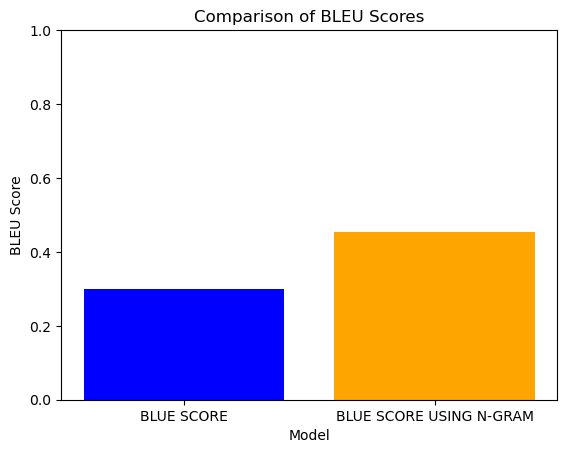

In [ ]:
import matplotlib.pyplot as plt
similarity_scores = {
    ''
    'BLEU SCORE': BLEUscore,
    'BLEU SCORE USING N-GRAM': BLEU_score
}

# Plotting the comparison
plt.bar(similarity_scores.keys(), similarity_scores.values(), color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('BLEU Score')
plt.title('Comparison of BLEU Scores')
plt.ylim(0, 1)  # Set y-axis limits
plt.show()

In [ ]:
#SPACY MODEL FOR SIMILARITY SCORE

In [ ]:
import spacy
try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    print("Downloading model. This may take some time...")
    spacy.cli.download("en_core_web_md")
    nlp = spacy.load("en_core_web_md")
def sentence_similarity(sentence1, sentence2, nlp):
    doc1 = nlp(sentence1)
    doc2 = nlp(sentence2)
    return doc1.similarity(doc2)
summarized_text = Summarized_Text
actual_summary = actual_summary
similarity_score = sentence_similarity(summarized_text, actual_summary, nlp)

print(f"Sentence Similarity Score using SPACY: {similarity_score}")

Sentence Similarity Score using SPACY: 0.841359608171587


In [ ]:
pip install --upgrade transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [ ]:
#BERT MODEL FOR SIMILARITY SCORE

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to calculate similarity score
def sentence_similarity(sentence1, sentence2, model, tokenizer):
    # Tokenize the sentences
    inputs = tokenizer([sentence1, sentence2], return_tensors='pt', padding=True, truncation=True, max_length=512)

    # Get the embeddings of the sentences
    with torch.no_grad():
        outputs = model(**inputs)
        # Use the CLS token embedding as sentence representation
        embeddings = outputs.last_hidden_state[:, 0, :]

    # Calculate the cosine similarity between the embeddings
    similarity_score1 = cosine_similarity(embeddings[0].reshape(1, -1), embeddings[1].reshape(1, -1))[0][0]
    return similarity_score1

# Example summarized text and actual summary (replace with your actual texts)
summarized_text = Summarized_Text
actual_summary = actual_summary

# Calculate similarity score
similarity_score1 = sentence_similarity(summarized_text, actual_summary, model, tokenizer)
print(f"Sentence Similarity Score using BERT: {similarity_score1}")

Sentence Similarity Score using BERT: 0.8222525119781494


In [ ]:
# COMPARING THE SIMILARITY SCORES

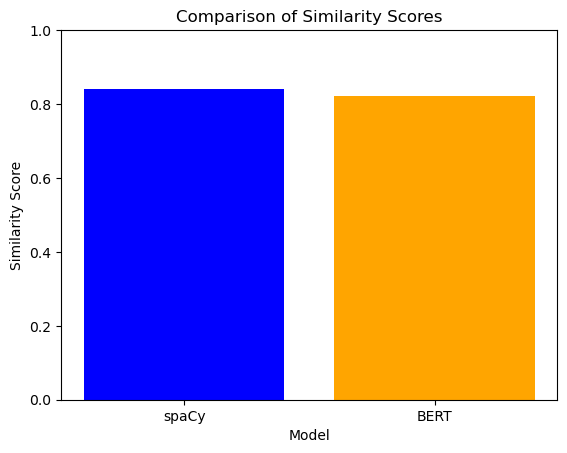

In [ ]:
import matplotlib.pyplot as plt

# Example similarity scores obtained individually
similarity_scores = {
    ''
    'spaCy': similarity_score,
    'BERT': similarity_score1
}

# Plotting the comparison
plt.bar(similarity_scores.keys(), similarity_scores.values(), color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Similarity Score')
plt.title('Comparison of Similarity Scores')
plt.ylim(0, 1)  # Set y-axis limits
plt.show()

In [ ]:
#Sumy is a Python tool offering multiple methods for automatic summarization of text.

In [ ]:
!pip install  sumy
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# For Strings
parser = PlaintextParser.from_string(Original_Text,Tokenizer("english"))

summarizer = LexRankSummarizer()
#Summarize the document with 2 sentences
summary = summarizer(parser.document, 5)

for sentence in summary:
    print(sentence)

TimeWarner said fourth quarter sales rose 2% to $11.in from $10.in.
TimeWarner also has to estate 2000 and 2003 results following a probe by the of Securities Exchange Commission (SEC), which is close to concluding.
Time Earner's fourth quarter profits were slightly better than analysis' expectations.
For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn.
It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue.
